In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from Functions import Correlations, Distributions, Metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
#APERTURA Y EXPLORACION
df = pd.read_csv('train.csv')
df.head(3)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


In [3]:
print(f'Filas y columnas: {df.shape}')

Filas y columnas: (165034, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
#DESCRIPCION DE LAS VARIABLES
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
#CONTEO DE NULOS
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Wrangling

### Variable **Gender**

In [7]:
#VALORES UNICOS DE LA VARIABLE
print(df.Gender.unique())

['Male' 'Female']


In [8]:
#REEMPLAZO DE VALORES
df.loc[df.Gender == 'Female', 'Gender'] = '0'
df.loc[df.Gender == 'Male', 'Gender'] = '1'
df.Gender = df.Gender.astype(int)

#RESULTADO
print(df.Gender.unique())

[1 0]


### Variable **Age**

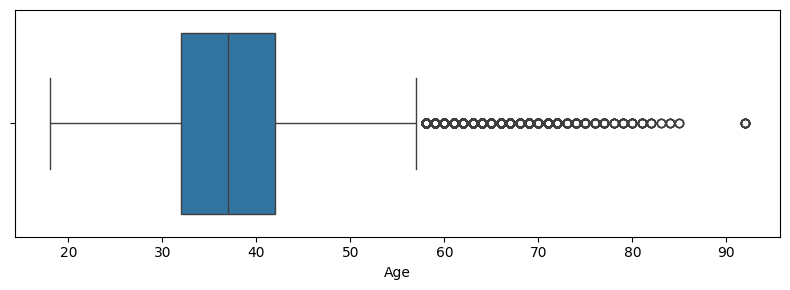

In [9]:
#GRAFICO EN BUSQUEDA DE OUTLIERS
plt.figure(figsize=(8,3))
sns.boxplot(x=df.Age, orient='h')
plt.tight_layout()
plt.show()

In [10]:
#IMPORTACION DE MODELO
from sklearn.covariance import EllipticEnvelope

#INSTANCIA Y PREDICCION
cov_det = EllipticEnvelope(contamination=0.025)
out_pred = cov_det.fit_predict(df.Age.values.reshape(-1,1))

#DATAFRAME COMPLEMENTARIO
out_pred = pd.concat([df.Age,
                      pd.Series(out_pred, name='is_outlier')],
                      axis=1)

#OUTLIERS ENCONTRADOS
out_pred.is_outlier.value_counts()

is_outlier
 1    161018
-1      4016
Name: count, dtype: int64

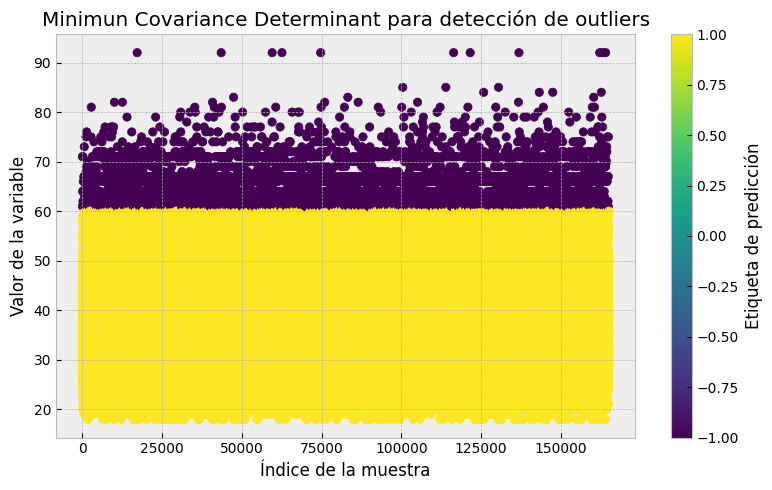

In [11]:
#GRAFICO DE OUTLIERS
mpl.style.use('bmh')
plt.figure(figsize=(8,5))
plt.scatter(out_pred.index, out_pred.Age, c=out_pred.is_outlier, cmap='viridis')
plt.xlabel('Índice de la muestra')
plt.ylabel('Valor de la variable')
plt.title('Minimun Covariance Determinant para detección de outliers')
plt.colorbar(label='Etiqueta de predicción')
plt.tight_layout()
plt.show()
mpl.style.use('default')

In [12]:
#SE TOMA LA MEDIANA DE LA VARIABLE PARA REALIZAR LA IMPUTACION
median = df.Age.median()

#IMPUTACION
out_pred['age_imput'] = out_pred.apply(lambda x: median if x.is_outlier == -1 else x.Age, axis=1)

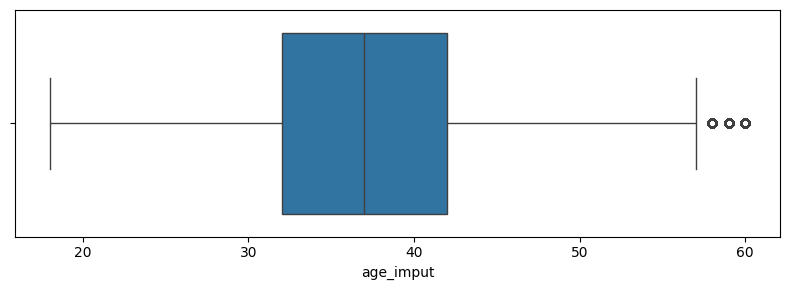

In [13]:
#GRAFICO DE OUTLIERS DESPUES DE IMPUTAR
plt.figure(figsize=(8,3))
sns.boxplot(x=out_pred.age_imput, orient='h')
plt.tight_layout()
plt.show()

In [14]:
#SE COMBINAN LOS VALORES IMPUTADOS CON EL DATAFRAME PRINCIPAL
#df.Age = out_pred.age_imput
#df.Age.describe()

### Variable **Geography**

In [15]:
#IMPORTACION DE LIBRERIA
from sklearn.preprocessing import LabelEncoder

#ISTANCIA Y ENTRENAMIENTO DEL MODELO PARA ENCODEAR
encoder = LabelEncoder()
countries = encoder.fit_transform(df.Geography)

#SE AGREGA VARIABLE NUEVA
df.loc[ : ,'geo_cod'] = countries
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo_cod
0,0,15674932,Okwudilichukwu,668,France,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,0
1,1,15749177,Okwudiliolisa,627,France,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,0
2,2,15694510,Hsueh,678,France,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,0
3,3,15741417,Kao,581,France,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,2


## EDA

### Analisis de correlaciones

#### Pearson

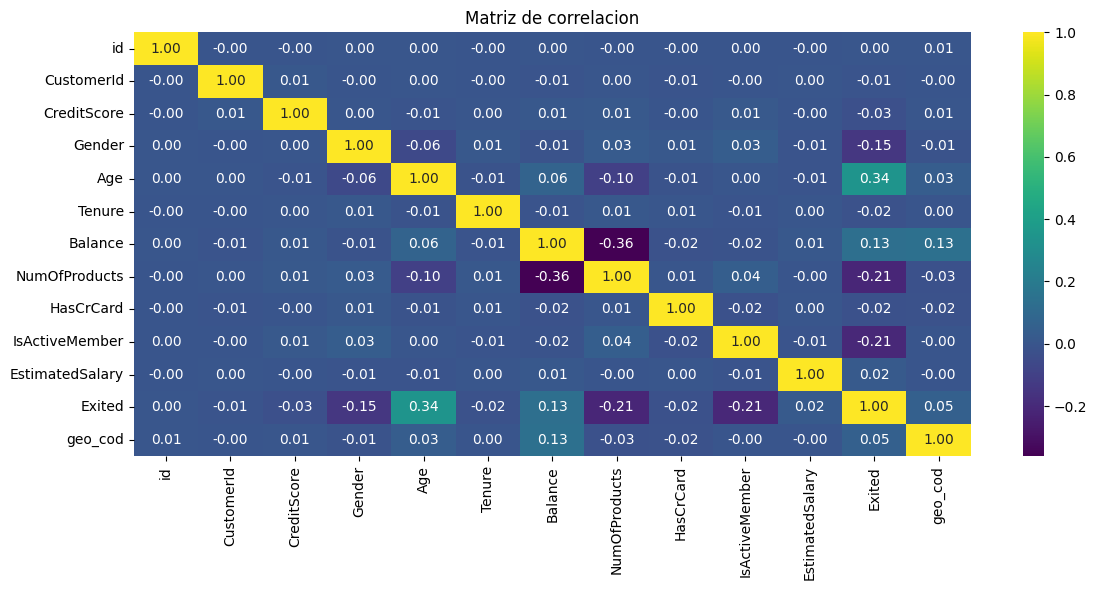

In [16]:
#GRAFICO DE MATRIZ DE CORRELACION PEARSON
matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,6))
sns.heatmap(matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('Matriz de correlacion')
plt.tight_layout()
plt.show()

#### Coeficiente de punto biserial (Variable target vs Variables cuantitativas)

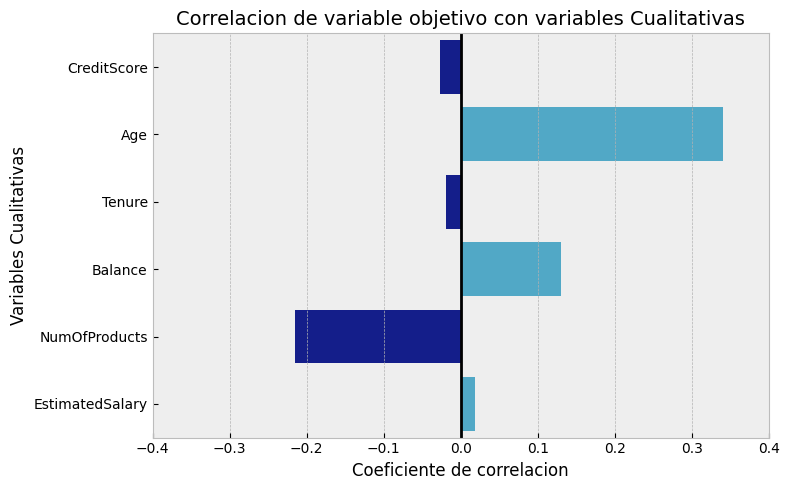

In [17]:
#GRAFICO DE CORRELACION DE PUNTO BISERIAL
numeric_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
Correlations(df, 'Exited', numeric_vars, 'Cualitativas').plot_biserial_point()

#### Coeficiente de contingencia (Variable Target vs Variables Cualitativas)

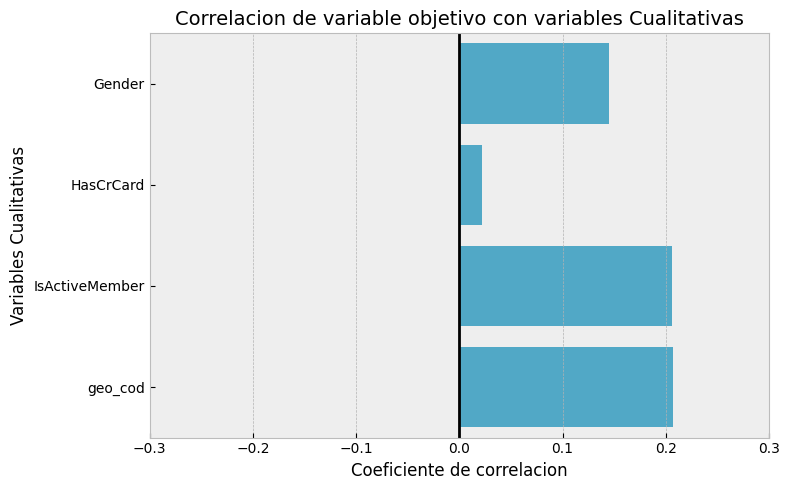

In [18]:
#GRAFICO COEFICIENTE DE CONTINGENCIA
cualit_vars = ['Gender','HasCrCard','IsActiveMember','geo_cod']
Correlations(df, 'Exited', cualit_vars, 'Cualitativas').plot_coef_contingency()

### Graficos

#### Analisis Univariado

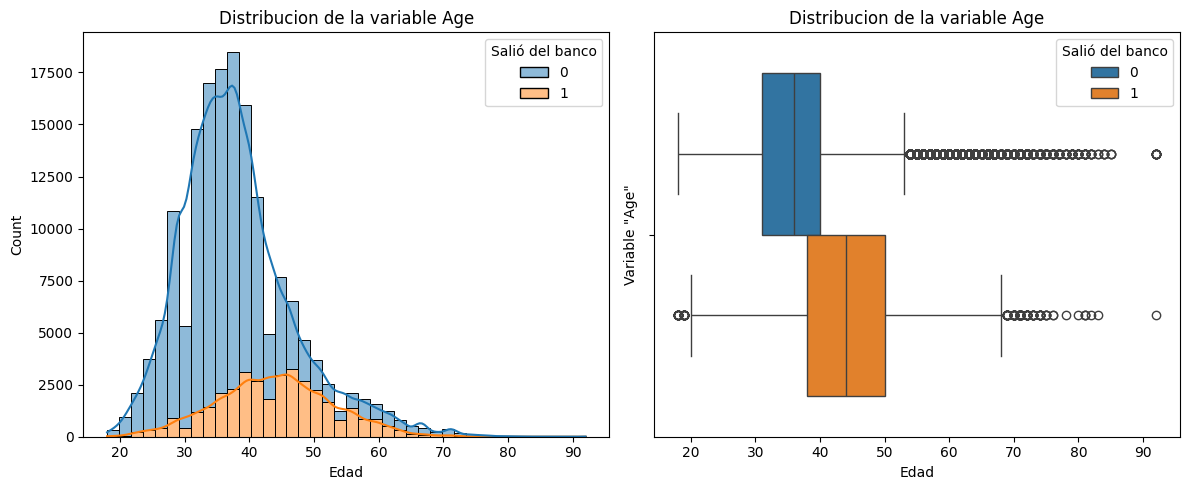

In [19]:
#DISTRIBUCION DE LA VARIABLE AGE
Distributions(df.Age, df.Exited, 'Age', 'Edad').plot_distribution(40)

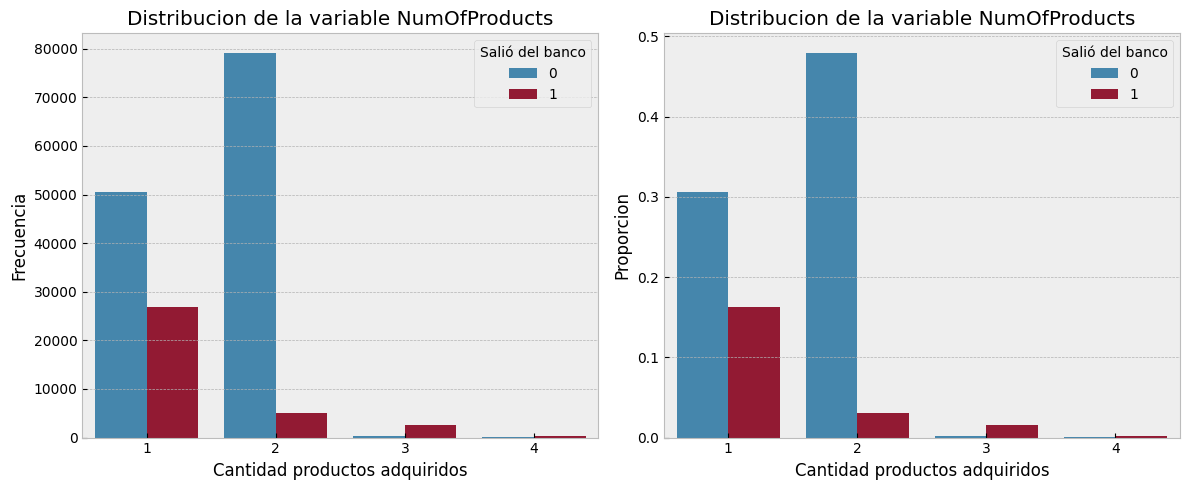

In [20]:
#DISTRIBUCION VARIABLE NUMOFPRODUCTS
Distributions(df.NumOfProducts, df.Exited, 'NumOfProducts', 'Cantidad productos adquiridos').plot_distribution_cualit()

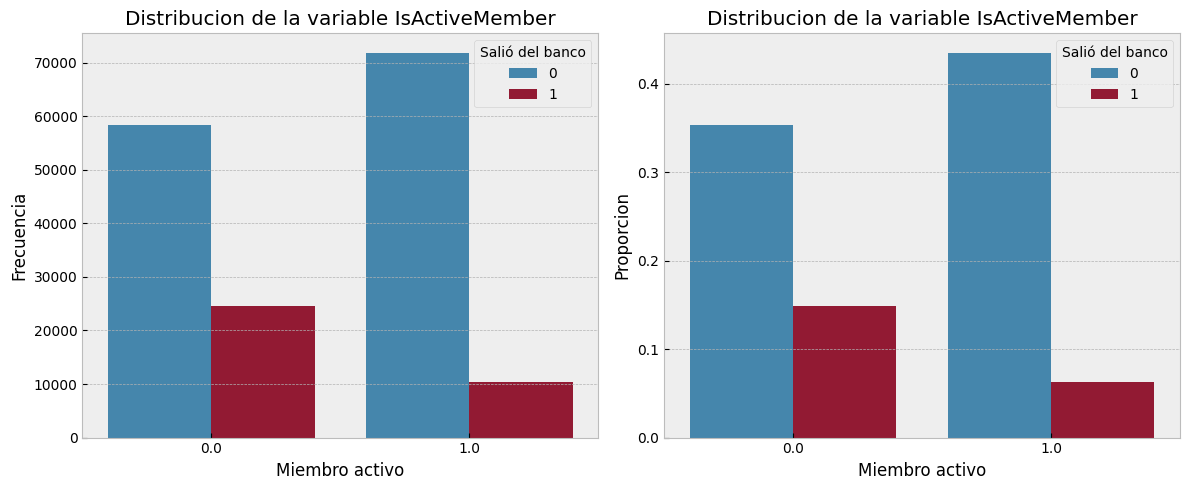

In [21]:
#DISTRIBUCION DE LA VARIABLE ISACTIVEMEMBER
Distributions(df.IsActiveMember, df.Exited, 'IsActiveMember', 'Miembro activo').plot_distribution_cualit()

#### Analisis Bivariado

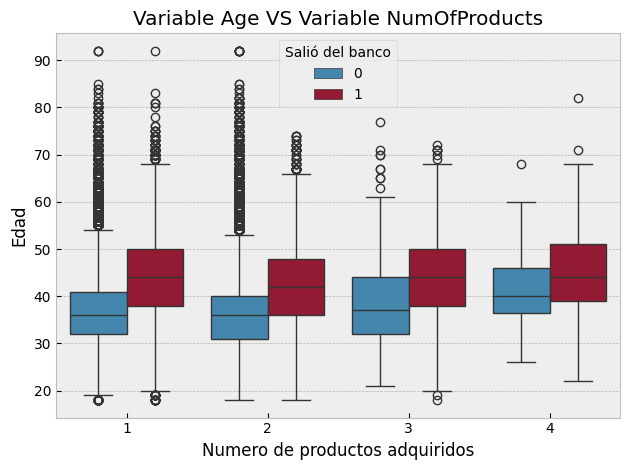

In [22]:
#GRAFICO VARIABLE NUMOFPRODUCT VS AGE
mpl.style.use('bmh')
sns.boxplot(x=df.NumOfProducts, y=df.Age, hue=df.Exited)
plt.title('Variable Age VS Variable NumOfProducts')
plt.xlabel('Numero de productos adquiridos')
plt.ylabel('Edad')
plt.legend(title='Salió del banco')
plt.tight_layout()
plt.show()
mpl.style.use('default')

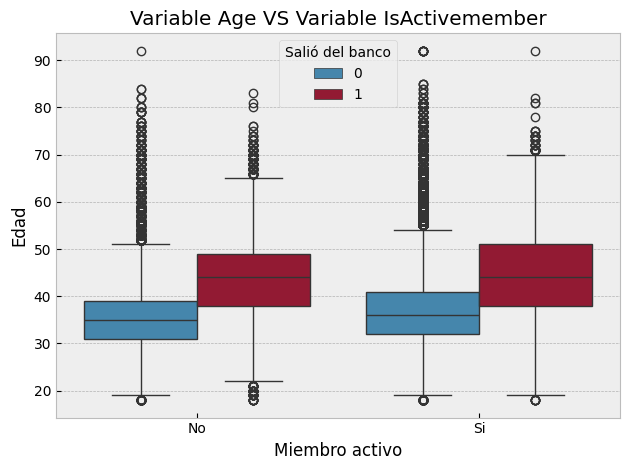

In [23]:
#GRAFICO VARIABLE ISACTIVEMEMBER VS AGE
mpl.style.use('bmh')
sns.boxplot(x=df.IsActiveMember, y=df.Age, hue=df.Exited)
plt.title('Variable Age VS Variable IsActivemember')
plt.xlabel('Miembro activo')
plt.ylabel('Edad')
plt.legend(title='Salió del banco')
plt.xticks(ticks=[0.0,1.0], labels=['No','Si'])
plt.tight_layout()
plt.show()
mpl.style.use('default')

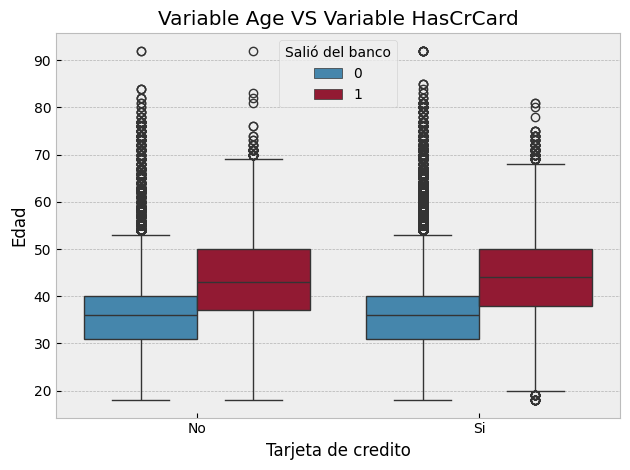

In [24]:
#GRAFICO VARIABLE HASCRCARDVS AGE
mpl.style.use('bmh')
sns.boxplot(x=df.HasCrCard, y=df.Age, hue=df.Exited)
plt.title('Variable Age VS Variable HasCrCard')
plt.xlabel('Tarjeta de credito')
plt.ylabel('Edad')
plt.legend(title='Salió del banco')
plt.xticks(ticks=[0.0,1.0], labels=['No','Si'])
plt.tight_layout()
plt.show()
mpl.style.use('default')

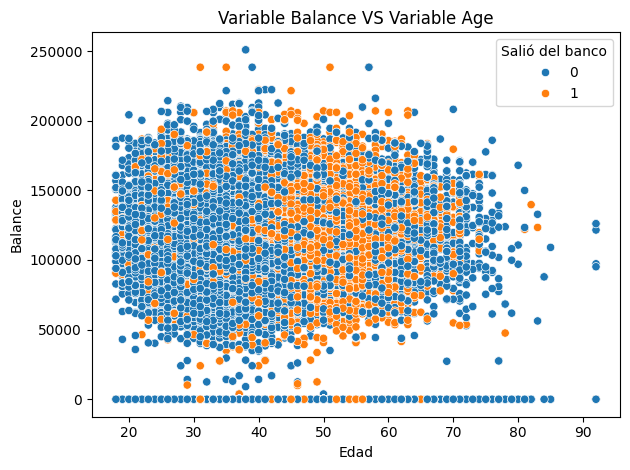

In [25]:
#VARIABLE BALANCE VS EDAD
sns.scatterplot(x=df.Age, y=df.Balance, hue=df.Exited)
plt.title('Variable Balance VS Variable Age')
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.legend(title='Salió del banco')
plt.tight_layout()
plt.show()

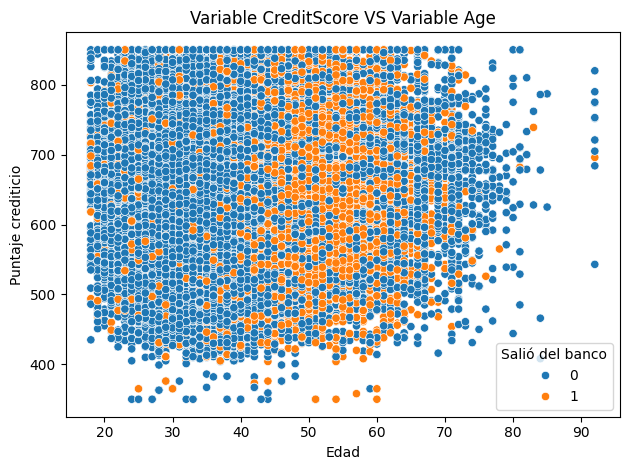

In [26]:
#VARIABLE CREDITSCORE VS VARIABLE AGE
sns.scatterplot(x=df.Age, y=df.CreditScore, hue=df.Exited)
plt.title('Variable CreditScore VS Variable Age')
plt.xlabel('Edad')
plt.ylabel('Puntaje crediticio')
plt.legend(title='Salió del banco')
plt.tight_layout()
plt.show()

#### Analisis Multivariado

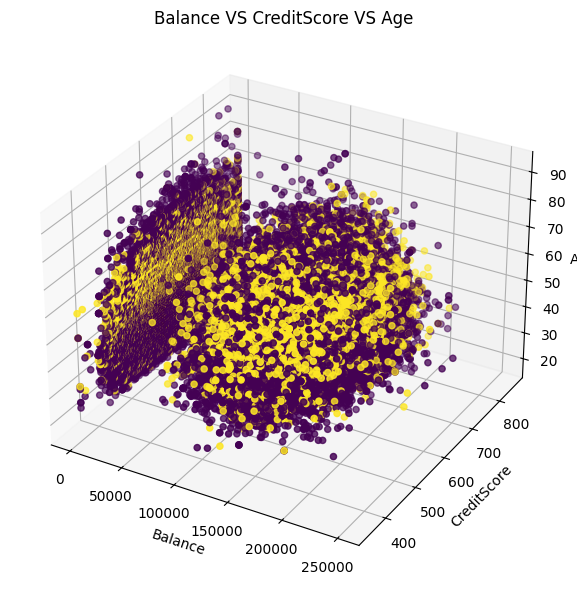

In [27]:
#Balance VS CreditScore VS Age
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,6))
ax.scatter(df.Balance, df.CreditScore, df.Age, c=df.Exited)
ax.set(xlabel='Balance',
       ylabel='CreditScore',
       zlabel='Age')
plt.title('Balance VS CreditScore VS Age')
plt.tight_layout()
plt.show()

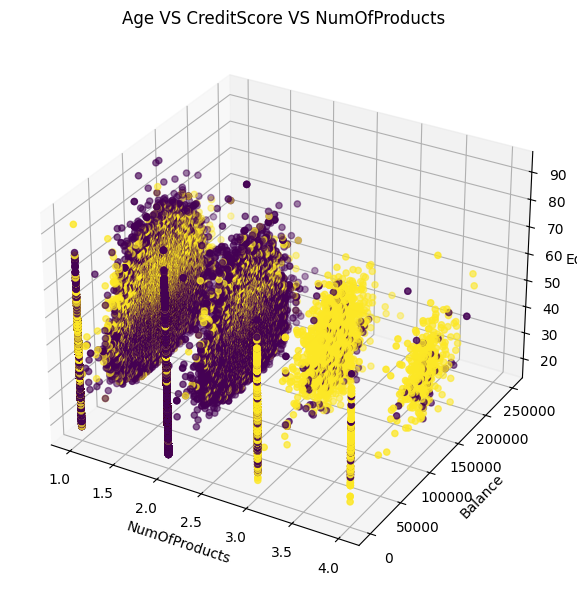

In [28]:
#Age VS CreditScore VS NumOfProducts
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,6))
ax.scatter(df.NumOfProducts, df.Balance, df.Age,  c=df.Exited)
ax.set(xlabel='NumOfProducts',
       ylabel='Balance',
       zlabel='Edad')
plt.title('Age VS CreditScore VS NumOfProducts')
plt.tight_layout()
plt.show()

## Modelado

### Feature Engineering

In [29]:
#EnCODING DE VARIABLES CUALITATIVAS
dummies = pd.get_dummies(df['Geography'], dtype=int)
dummies.head()

,France,Germany,Spain
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [ ]:
#NORMALIZACION
from sklearn.preprocessing import StandardScaler

#LISTA DE VARIABLES A NORMALIZAR
vars = ['Age','Balance']#'CreditScore',

#INSTANCIA DEL MODELO Y TRANSOFRMACION
std_vars = StandardScaler().fit_transform(df[vars])

#SE CREA DATAFRAME COMPLEMETARIO
std_vars = pd.DataFrame(std_vars, columns=vars)
std_vars.head(3)

,Age,Balance
0,-0.578074,-0.883163
1,-0.578074,-0.883163
2,0.211354,-0.883163


In [ ]:
#SELECCION DE VARIABLES
vars = ['NumOfProducts','IsActiveMember','Gender']

#VARIABLES PREDICTIVAS
x = pd.concat([df[vars],
                std_vars,
                dummies], axis=1)

#VARIABLE OBJETIVO
y = df.Exited

### UnderSample

In [ ]:
#DISTRIBUCION DE LAS CLASES EN Y
print(f'Cantidad de observaciones con clase 0: {sum(y==0)}')
print(f'Cantidad de observaciones con clase 1: {sum(y==1)}')

Cantidad de observaciones con clase 0: 130113
Cantidad de observaciones con clase 1: 34921


In [ ]:
#IMPORTACION DE LIBRERIA
from imblearn.under_sampling import RandomUnderSampler

#PORCENTAJE DE REDUCCION VARIABLE MAYORITARIA
perc_reduce = int(sum(y==0)*0.6)

#SET HIPERPARAMETRO
sampling_strategy = {0:perc_reduce, 1:sum(y==1)}

#INSTANCIA ,ENTRAMIENTO Y TRANSFORMACION DEL MODELO
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
x_under, y_under = rus.fit_resample(x, y)

#RESULTADO
print(f'Cantidad de observaciones con clase 0: {sum(y_under==0)}')
print(f'Cantidad de observaciones con clase 1: {sum(y_under==1)}')


Cantidad de observaciones con clase 0: 78067
Cantidad de observaciones con clase 1: 34921


### OverSample

In [ ]:
#IMPORTACION DE LIBRERIA
from imblearn.over_sampling import SMOTE

#PORCENTAJE DE REDUCCION VARIABLE MAYORITARIA
perc_increase = int(sum(y==0)*0.5)

#SET HIPERPARAMETRO
sampling_strategy = {0:sum(y==0), 1:perc_increase}

#INSTANCIA ,ENTRAMIENTO Y TRANSFORMACION DEL MODELO
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
x_over, y_over = smote.fit_resample(x, y)

#RESULTADO
print(f'Cantidad de observaciones con clase 0: {sum(y_over==0)}')
print(f'Cantidad de observaciones con clase 1: {sum(y_over==1)}')

Cantidad de observaciones con clase 0: 130113
Cantidad de observaciones con clase 1: 65056


### KNN - Entrenamiento y validacion simple del modelo

In [ ]:
#DIVISION DE DATOS PARA TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.33, stratify=y_under,random_state=42)

#IMPORTACION DE LIBRERIA
from sklearn.neighbors import KNeighborsClassifier

#INSTANCIA Y ENTRENAMIENTO DEL MODELO
model = KNeighborsClassifier(n_neighbors=35)
model.fit(X_train, y_train)

#PREDICCION
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test ,y_pred=y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8292


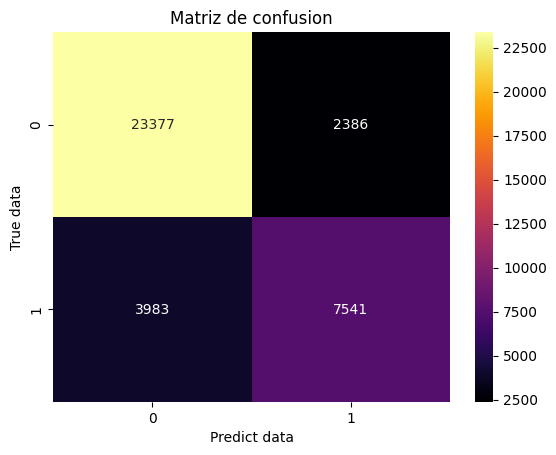

In [ ]:
#GRAFICO MATRIZ DE CONFUSION
Metrics().plot_confusion_matrix_dicotomic(y_test, y_pred, None, None)

In [ ]:
#REPORTE
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     25763
           1       0.76      0.65      0.70     11524

    accuracy                           0.83     37287
   macro avg       0.81      0.78      0.79     37287
weighted avg       0.83      0.83      0.83     37287



In [ ]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob):.4f}')

Score curva ROC: 0.8767


In [ ]:
#DIVISION DE DATOS PARA TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.33, stratify=y_over,random_state=42)

#IMPORTACION DE LIBRERIA
from sklearn.neighbors import KNeighborsClassifier

#INSTANCIA Y ENTRENAMIENTO DEL MODELO
model = KNeighborsClassifier(n_neighbors=35)
model.fit(X_train, y_train)

#PREDICCION
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test ,y_pred=y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8265


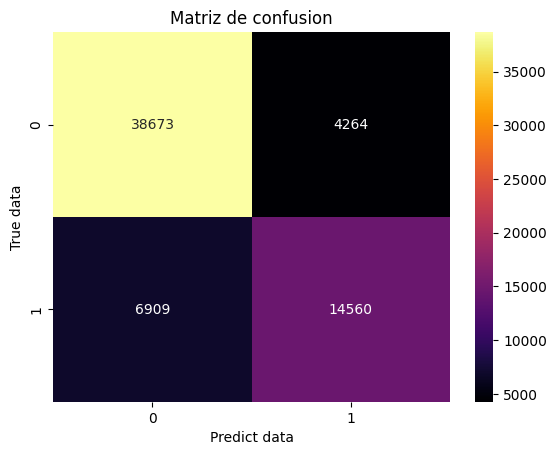

In [ ]:
#GRAFICO MATRIZ DE CONFUSION
Metrics().plot_confusion_matrix_dicotomic(y_test, y_pred, None, None)

In [ ]:
#REPORTE
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     42937
           1       0.77      0.68      0.72     21469

    accuracy                           0.83     64406
   macro avg       0.81      0.79      0.80     64406
weighted avg       0.82      0.83      0.82     64406



In [ ]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob):.4f}')

Score curva ROC: 0.8869


### Random Forest - Entrenamiento y validacion simple del modelo

In [ ]:
#IMPOTRACION DE MODELO PARA TEST DE PARAMETROS
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid_param = param_grid = {
    'criterion' : ['entropy'],
    'n_estimators': [200, 300],
    'max_depth': [10, 18, 20],
    #'max_features' : [0.5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False],
    'random_state': [42]
}

#SE ENTRENA MODELO UTILIZANDO GRIDSEARCH
model = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=param_grid,
                     cv=3, n_jobs=-1,
                     scoring='accuracy')

model.fit(X_train, y_train)

model.best_score_

In [ ]:
#DIVISION DE DATOS PARA TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.33, stratify=y_under,random_state=42)

#IMPORTACION DE LIBRERIA
from sklearn.ensemble import RandomForestClassifier

#INSTANCIA Y ENTRENAMIENTO DEL MODELO
model = RandomForestClassifier( bootstrap=True,
                                criterion='entropy',
                                max_depth=10,
                                min_samples_leaf=4,
                                min_samples_split=5,
                                n_estimators=200,
                                random_state=42)
model.fit(X_train, y_train)

#PREDICCION
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test ,y_pred=y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8314


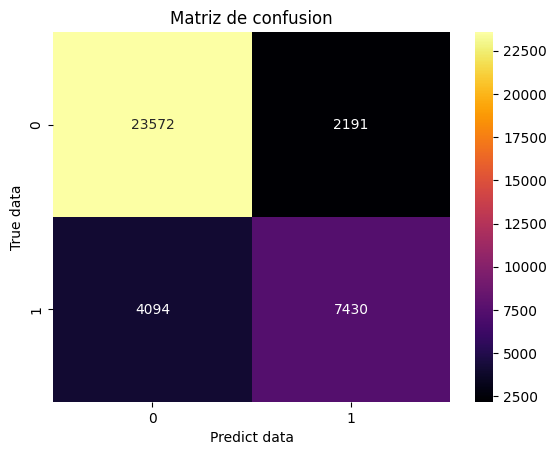

In [ ]:
#GRAFICO DE MATRIZ DE CONFUSION
Metrics().plot_confusion_matrix_dicotomic(y_test, y_pred, None, None)

In [ ]:
#REPORTE
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     25763
           1       0.77      0.64      0.70     11524

    accuracy                           0.83     37287
   macro avg       0.81      0.78      0.79     37287
weighted avg       0.83      0.83      0.83     37287



In [ ]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob):.4f}')

Score curva ROC: 0.8835


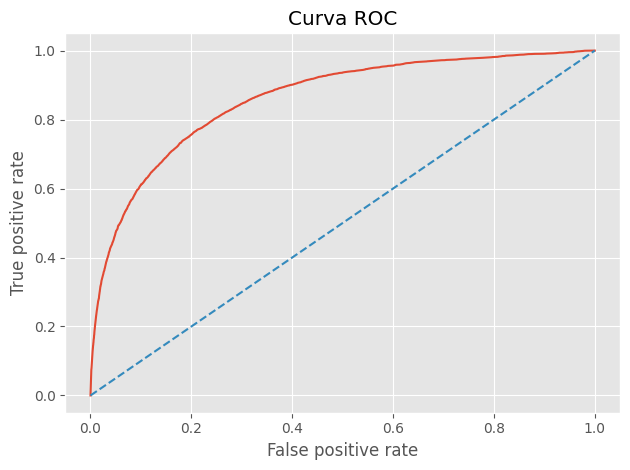

In [ ]:
#PLOT CURVE ROC
Metrics().plot_roc_curve(y_test, y_prob)

In [ ]:
#DIVISION DE DATOS PARA TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.33, stratify=y_over,random_state=42)

#IMPORTACION DE LIBRERIA
from sklearn.ensemble import RandomForestClassifier

#INSTANCIA Y ENTRENAMIENTO DEL MODELO
model = RandomForestClassifier( bootstrap=True,
                                criterion='entropy',
                                max_depth=10,
                                min_samples_leaf=4,
                                min_samples_split=5,
                                n_estimators=200,
                                random_state=42)
model.fit(X_train, y_train)

#PREDICCION
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test ,y_pred=y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8298


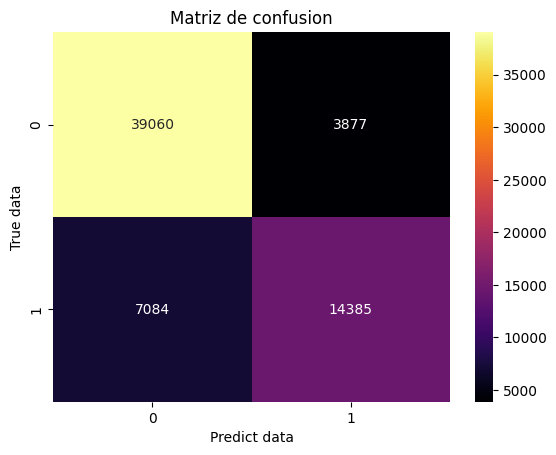

In [ ]:
#GRAFICO DE MATRIZ DE CONFUSION
Metrics().plot_confusion_matrix_dicotomic(y_test, y_pred, None, None)

In [ ]:
#REPORTE
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     42937
           1       0.79      0.67      0.72     21469

    accuracy                           0.83     64406
   macro avg       0.82      0.79      0.80     64406
weighted avg       0.83      0.83      0.83     64406



In [ ]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob):.4f}')

Score curva ROC: 0.8911


### XG-Boost - Entrenamiento y validacion simple del modelo

In [ ]:
#IMPOTRACION DE MODELO PARA TEST DE PARAMETROS
from sklearn.model_selection import GridSearchCV

#GRILLA DE PARAMETROS PARA TESTEAR
param_grid = {
    'objective' :['binary:logistic'],
    'max_depth': [10, 15],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [9, 15],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0.1, 0.2],
    'random_state': [47]
}

In [ ]:
#IMPORTACION MODELO DE BOOOSTING
from xgboost import XGBClassifier

#SE ENTRENA MODELO UTILIZANDO GRIDSEARCH
#model = GridSearchCV(estimator=XGBClassifier(),
#                     param_grid=param_grid,
#                     cv=3, n_jobs=-1,
#                     scoring='accuracy')

#DIVISION DE DATOS PARA TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.33, stratify=y_under,random_state=42)

model = XGBClassifier( objective = 'binary:logistic',
                       max_depth = 10,
                       learning_rate = 0.2,
                       n_estimators = 15,
                       subsample = 0.9,
                       colsample_bytree = 0.8,
                       gamma = 0.2,
                       random_state = 47)

#ENTRENAMIENTO
model.fit(X_train,y_train)

#PREDICCION
y_pred = model.predict(X_test)

#SCORE
accuracy = accuracy_score(y_true=y_test ,y_pred=y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8308


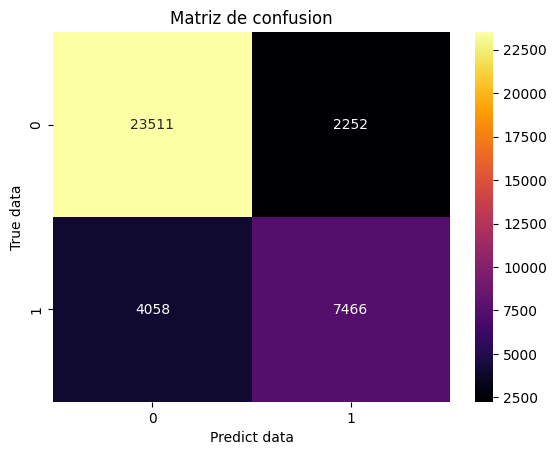

In [ ]:
#GRAFICO MATRIZ DE CONFUSION
Metrics().plot_confusion_matrix_dicotomic(y_test, y_pred, None, None)

In [ ]:
#REPORTE
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     25763
           1       0.77      0.65      0.70     11524

    accuracy                           0.83     37287
   macro avg       0.81      0.78      0.79     37287
weighted avg       0.83      0.83      0.83     37287



In [ ]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob):.4f}')

Score curva ROC: 0.8827


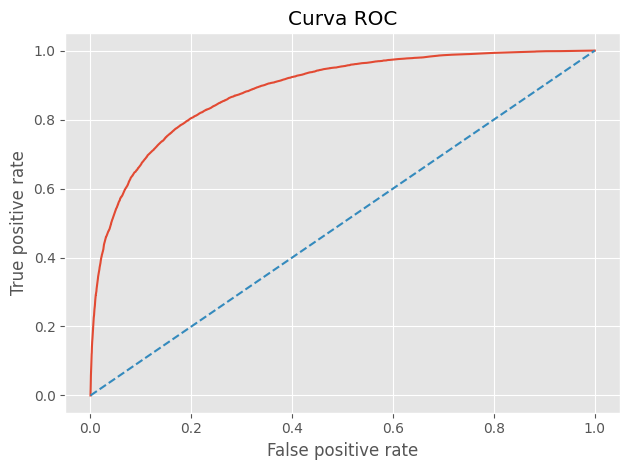

In [ ]:
#PLOT CURVE ROC
Metrics().plot_roc_curve(y_test, y_prob)

In [ ]:
#DIVISION DE DATOS PARA TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.33, stratify=y_over,random_state=42)

model = XGBClassifier( objective = 'binary:logistic',
                       max_depth = 10,
                       learning_rate = 0.2,
                       n_estimators = 15,
                       subsample = 0.9,
                       colsample_bytree = 0.8,
                       gamma = 0.2,
                       random_state = 47)

#ENTRENAMIENTO
model.fit(X_train,y_train)

#PREDICCION
y_pred = model.predict(X_test)

#SCORE
accuracy = accuracy_score(y_true=y_test ,y_pred=y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8321


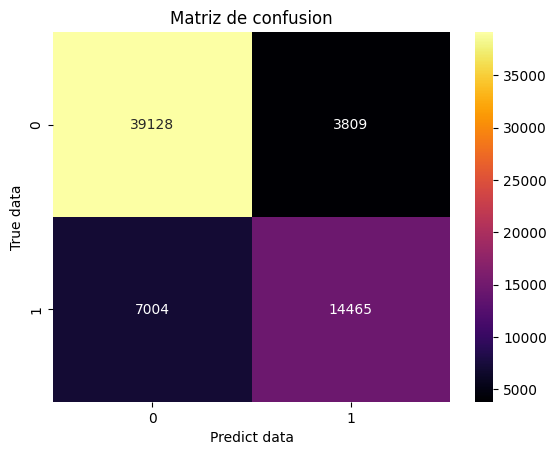

In [ ]:
#GRAFICO MATRIZ DE CONFUSION
Metrics().plot_confusion_matrix_dicotomic(y_test, y_pred, None, None)

In [ ]:
#REPORTE
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     42937
           1       0.79      0.67      0.73     21469

    accuracy                           0.83     64406
   macro avg       0.82      0.79      0.80     64406
weighted avg       0.83      0.83      0.83     64406



In [ ]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob):.4f}')

Score curva ROC: 0.8935


model = GridSearchCV(DecisionTreeClassifier(),
                     param_grid=param_grid,
                     cv=3,
                     n_jobs=-1,
                     scoring='accuracy')

model.fit(X_train, y_train)

print(f'Mejor puntaje de validacion cruzada(en entrenamiento): {model.best_score_}')
print('\nMejores parametros:')
for key, value in model.best_params_.items():
    print(f'\t{key}: {value}')

### Prediccion

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
#TRANSFORMACION VARIABLE GENDER
df_test.loc[df_test.Gender == 'Female', 'Gender'] = '0'
df_test.loc[df_test.Gender == 'Male', 'Gender'] = '1'
df_test.Gender = df_test.Gender.astype(int)
df_test.Gender.value_counts()

#TRANSFORMACION DE VARIABLES CATEGORICAS
dummies = pd.get_dummies(df_test['Geography'], dtype=int)
dummies.head()

#LISTA DE VARIABLES A NORMALIZAR
vars = ['Age','Balance']

#INSTANCIA DEL MODELO Y TRANSOFRMACION
std_vars = StandardScaler().fit_transform(df_test[vars])

#SE CREA DATAFRAME COMPLEMETARIO
std_vars = pd.DataFrame(std_vars, columns=vars)

#SELECCION DE VARIABLES
vars = ['NumOfProducts','IsActiveMember','Gender']

#VARIABLES PREDICTIVAS
x = pd.concat([df_test[vars],
                std_vars,
                dummies], axis=1)

#PREDICCION
y_pred = model.predict(x)

In [ ]:
#CONCATENACION DE ARCHIVO PARA EXPORTAR
y_pred = pd.Series(y_pred, name='Exited')
sample_submission = pd.concat([df_test.id, y_pred], axis=1)

In [ ]:
#sample_submission.to_csv('submission.csv', index=False)

In [ ]:
sample_submission.head()

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,1
